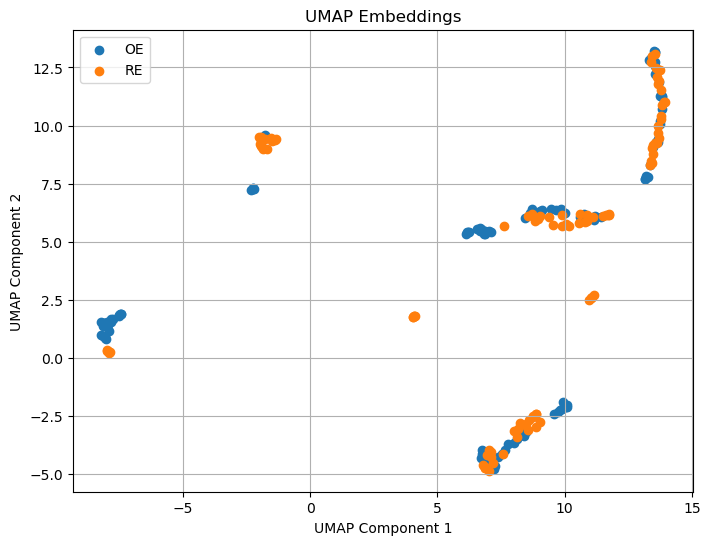

In [1]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
import umap.umap_ as umap

def z_score_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

def open_files_and_perform_umap():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    # Open file dialog and get the file paths for multiple spectra
    file_paths = filedialog.askopenfilenames()
    if file_paths:
        spectra = []
        labels = []  # To store tissue type labels
        for file_path in file_paths:
            # Reading each OPUS file
            opus_data = read_file(file_path)
            absorbance = opus_data['AB']
            # Z-Score normalization
            absorbance_normalized = z_score_normalization(absorbance)
            spectra.append(absorbance_normalized)
            
            # Extract tissue type from file name
            file_name = os.path.basename(file_path)
            if 'RE' in file_name:
                tissue_type = 'RE'
            elif 'OE' in file_name:
                tissue_type = 'OE'
            else:
                raise ValueError("Invalid tissue type in file name")

            labels.append(tissue_type)

        # Convert list of spectra into numpy array
        spectra = np.array(spectra)
        labels = np.array(labels)

        # Perform UMAP
        reducer = umap.UMAP(n_components=2)  # You can adjust the number of components as needed
        umap_embeddings = reducer.fit_transform(spectra)

        # Plot UMAP embeddings with different colors for different tissue types
        plt.figure(figsize=(8, 6))
        for tissue_type in np.unique(labels):
            indices = np.where(labels == tissue_type)
            plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], label=tissue_type)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title('UMAP Embeddings')
        plt.legend()
        plt.grid(True)
        plt.show()

open_files_and_perform_umap()
